Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

---

Please **submit this Jupyter notebook through Canvas** no later than **November 30, 15:00**.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
In the box below, write down the names + student ID of the people in your group.

Daniël Vink - 10675140 \
Sam Kuilboer - 12442690

# The global keyword (helpful info for exercise 3)
In exercise 3 you are asked, at some point, to count the number of times a certain function is evaluated. One way of doing this is using a global variable. To change a global variable x from inside a function, the global keyword is used.

In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

# to change a global variable x from inside a function, use the global keyword
def foo():
    global x
    x = x*2
    
x=4
print("x before:", x) 
foo()
print("x after:", x)

# verify for yourself that omitting the line "global x" produces an error

x before: 4
x after: 8


-----
# Exercise 1
**N.B. This is a pen-and-paper exercise. If you prefer you may upload a separate pdf for this exercise and other pen-and-paper exercises. If you do, don't put both files in a single .zip file, upload them both separately.**

## (a) (exercise 6.4(b)) 1 point

Consider the minimization of 
$$
  f(x,y) = x^2 + y^2
$$
subject to
$$
  g(x,y) = xy^2 -1 = 0 .
$$
Determine the critical points of the Lagrangian function for this problem and determine whether each is a constrained minimum, a constrained maximum, or neither.


The critical points of the Lagrangian function is the solution to the problem: \
$\nabla \mathcal{L}(x, \lambda) = \begin{bmatrix} \nabla f(x,y) + J_g^T(x, y)\lambda \\ g(x, y) \end{bmatrix} = 0$ \
We can calculate the gradient of f and the Jacobian of g as: \
$\nabla f(x, y) = \begin{bmatrix} 2x \\ 2y \end{bmatrix}\\
J_g(x, y) = \begin{bmatrix} y^2 & 2xy \end{bmatrix}$ \
So we can write the critical points problem as the following three non-linear equations:\
$ 2x + \lambda y^2 = 0 $ \
$ 2y + \lambda 2xy = 0 $ \
$ xy^2 - 1 = 0 $ 

If we solve the first two equations for $\lambda$ we end up with: \
$ \lambda = \frac{-2x}{y^2} $ \
$ \lambda = \frac{-1}{x} $ 

Setting these two equation to be equal to another we can work out that: \
$ \frac{-2x}{y^2} = \frac{-1}{x} \rightarrow$ \
$ \frac{2x}{y^2} = \frac{1}{x} \rightarrow$ \
$ \frac{y^2}{2x} = x $ \
And that: \
$ y^2 = 2x^2 $ 

If we fill in this value for $y^2$ in the constraint function, we can work out that: \
$ x 2x^2 - 1 = 0 \rightarrow $ \
$ 2x^3 = 1 \rightarrow $ \
$ x = \sqrt[3]{0.5}$

And filling in this value for $x$ in the value for $y^2$: \
$ y^2 = 2x^2 \rightarrow $ \
$ y = \sqrt{2x^2} \rightarrow $ \
$ y = \sqrt{2} * \sqrt{x^2} \rightarrow $ \
$ y = \sqrt{2} * \pm x \rightarrow $ \
$ y = \sqrt{2} * \pm \sqrt[3]{0.5}$

If we look at the Hessian of $f(x, y)$: \
$\begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}$  \
We immediately see it has a positive determinant with positive eigenvalues which means our points \
\begin{bmatrix}\sqrt[3]{0.5} \\ \sqrt{2}*\sqrt[3]{0.5} \end{bmatrix} and \begin{bmatrix}\sqrt[3]{0.5} \\ \sqrt{2}*- \sqrt[3]{0.5} \end{bmatrix} \
are both constrained minima.

## (b) (exercise 6.4(c)) 1 point

Minimize $x+y+3$ under the constraint that $x^2 + x +y^2+y = 4$. Prove that the point you find is a minimum.

The critical points of the Lagrangian function is the solution to the problem: \
$\nabla \mathcal{L}(x, \lambda) = \begin{bmatrix} \nabla f(x,y) + J_g^T(x, y)\lambda \\ g(x, y) \end{bmatrix} = 0$ \
We can calculate the gradient of f and the Jacobian of g as: \
$\nabla f(x, y) = \begin{bmatrix} 1 \\ 1 \end{bmatrix}\\
J_g(x, y) = \begin{bmatrix} 2x + 1 & 2y + 1 \end{bmatrix}$ \

So we can write the critical points problem as the following two non-linear equations:\
$ 1 = \lambda(2x + 1) $ \
$ 1 = \lambda(2y + 1) $ \

If we solve the equations for $x$ and $y$ we end up with: \
$ x = -\frac{1}{2} + \frac{1}{2\lambda} $ \
$ y = -\frac{1}{2} + \frac{1}{2\lambda}  $ 

We see that x = y.

If we fill in these values in the third equation: \
$ x^2 + x + y^2 + y = 4 \rightarrow 2x^2 + 2x = 4$ \
$ x^2 + x - 2 = 0$ \
$ (x + 2)(x - 1) = 0$ \
$ x = -2 \vee x = 1$ \

If we replace x with the value of lambda: \
$ -\frac{1}{2} + \frac{1}{2\lambda} = -2 \vee -\frac{1}{2} + \frac{1}{2\lambda} = 1$ \
$ \lambda = -\frac{1}{3} \vee \lambda = \frac{1}{3}$ 

If we fill in this value for lambda in the function for x and y, we get the values of x and y: \
$ x = -\frac{1}{2} + \frac{1}{2\lambda} $ \
$ x = -\frac{1}{2} + \frac{1}{2 * \frac{1}{3}}$ \
$ x = 1 \vee x = -2 $ 

Which gives us the following points (1, 1) and (-2, -2)

---
# Exercise 2

## (a) 1 point
 The Rosenbrock function is given by

$$
f(x,y) = 100 (y-x^2)^2 + (1-x)^2
$$

What is the gradient of $f$? Show that there is exactly one local minimum point and determine this point (N.B. this is a pen-and-paper exercise.)

We first compute the gradient of f(x, y) and set it to zero:

$\nabla f = \begin{bmatrix} -400x(y-x^2) - 2(1-x) \\ 200(y-x^2) \end{bmatrix} = 0$

Calculate the values for x and y:

Rewrite the functions for $\alpha = 1$ and $\beta = 100$ and solve them: \
$2 \beta (y - x^2) = 0$ \
$2\beta = 0 \vee y - x^2 = 0$ \
$ y = x^2$

$-2(\alpha - x) - 4\beta x(y - x^2) = 0$ \
$-(\alpha - x) - 2\beta x(y - x^2) = 0$ 

$y = x^2 $ gives the following: \
$(\alpha - x) + 2\beta(x^2 - x^2) = 0$ \
$\alpha - x = 0$ \
$ x = \alpha $, $y = x^2$ and $\alpha = 1$ gives us $(\alpha, \alpha^2) = (1, 1)$

Secondly, we compute the Hessian of the Rosenbrock function:

$H  = \begin{bmatrix}  
\frac{\partial^{2} f}{\partial x^2} & \frac{\partial^{2} f}{\partial x * \partial y } \\  
\frac{\partial^{2} f}{\partial x_{i}} & \frac{\partial^{2} f}{ \partial y^2 }  
\end{bmatrix}$

$ H =
\begin{bmatrix}  
1200x^2 - 400x + 2 & -400y \\  
-400x & 200 
\end{bmatrix}
$

When the Hessian matrix is positive definite at a point $x^*$, then this point is a local minimum. Fill in (1, 1):

$ H =
\begin{bmatrix}  
802 & -400 \\  
-400 & 200 
\end{bmatrix}
$

The matrix has positive eigenvalues and is a positive definite matrix. So its minimum is at the point (1,1). $f(1, 1) = 0$


## (b) 2 points
Implement the method of steepest descent. Use ``scipy.optimize.line_search`` as line search method.

Test your method on the Rosenbrock function starting from $(x,y) = (0,0)$.
Plot the convergence to the minimum.


Alpha params:  <function gradf at 0x7facda608790> [0. 0.] [ 2. -0.] [-2.  0.]
Alpha params:  <function gradf at 0x7facda608790> [0.17354647 0.        ] [-0.43786823  6.02367558] [ 0.43786823 -6.02367558]
Alpha params:  <function gradf at 0x7facda608790> [0.17144923 0.02885139] [1.61983189 0.10869004] [-1.61983189 -0.10869004]
Alpha params:  <function gradf at 0x7facda608790> [0.23068726 0.03282624] [-0.34289461  4.07807541] [ 0.34289461 -4.07807541]
Alpha params:  <function gradf at 0x7facda608790> [0.22908497 0.05188239] [1.487076 0.119506] [-1.487076 -0.119506]
Alpha params:  <function gradf at 0x7facda608790> [0.28486683 0.0563652 ] [-1.39377985  4.9567831 ] [ 1.39377985 -4.9567831 ]
Alpha params:  <function gradf at 0x7facda608790> [0.27918074 0.07658698] [1.29033266 0.2709819 ] [-1.29033266 -0.2709819 ]
Alpha params:  <function gradf at 0x7facda608790> [0.33042241 0.08734821] [-1.54619429  4.36615279] [ 1.54619429 -4.36615279]
Alpha params:  <function gradf at 0x7facda608790> [0.3

Alpha params:  <function gradf at 0x7facda608790> [0.73886677 0.54368147] [-0.14053716  0.44852716] [ 0.14053716 -0.44852716]
Alpha params:  <function gradf at 0x7facda608790> [0.73850615 0.5448324 ] [0.35787942 0.11178532] [-0.35787942 -0.11178532]
Alpha params:  <function gradf at 0x7facda608790> [0.73991531 0.54527256] [-0.13157922  0.44042108] [ 0.13157922 -0.44042108]
Alpha params:  <function gradf at 0x7facda608790> [0.73957065 0.54642621] [0.36154334 0.107708  ] [-0.36154334 -0.107708  ]
Alpha params:  <function gradf at 0x7facda608790> [0.74094391 0.54683532] [-0.12282204  0.43251197] [ 0.12282204 -0.43251197]
Alpha params:  <function gradf at 0x7facda608790> [0.74061511 0.54799318] [0.36544646 0.10351081] [-0.36544646 -0.10351081]
Alpha params:  <function gradf at 0x7facda608790> [0.74195448 0.54837255] [-0.11424219  0.42477892] [ 0.11424219 -0.42477892]
Alpha params:  <function gradf at 0x7facda608790> [0.74164151 0.54953625] [0.36961234 0.09917504] [-0.36961234 -0.09917504]


Alpha params:  <function gradf at 0x7facda608790> [0.80072737 0.64017763] [0.08251549 0.19733918] [-0.08251549 -0.19733918]
Alpha params:  <function gradf at 0x7facda608790> [0.80556798 0.65175414] [ 1.29573078 -0.56287412] [-1.29573078  0.56287412]
Alpha params:  <function gradf at 0x7facda608790> [0.80738855 0.65096328] [0.09036798 0.18259791] [-0.09036798 -0.18259791]
Alpha params:  <function gradf at 0x7facda608790> [0.82801566 0.69264251] [ 2.67320074 -1.40651449] [-2.67320074  1.40651449]
Alpha params:  <function gradf at 0x7facda608790> [0.83153487 0.69079087] [0.11761347 0.13187468] [-0.11761347 -0.13187468]
Alpha params:  <function gradf at 0x7facda608790> [0.83546662 0.69519935] [-0.60836369  0.56102209] [ 0.60836369 -0.56102209]
Alpha params:  <function gradf at 0x7facda608790> [0.83462843 0.69597232] [0.11965262 0.12645779] [-0.11965262 -0.12645779]
Alpha params:  <function gradf at 0x7facda608790> [0.83785947 0.69938712] [-0.55425212  0.5242724 ] [ 0.55425212 -0.5242724 ]


Alpha params:  <function gradf at 0x7facda608790> [0.87520928 0.76569235] [0.14492642 0.05978856] [-0.14492642 -0.05978856]
Alpha params:  <function gradf at 0x7facda608790> [0.87567709 0.76588534] [-0.07536252  0.18500447] [ 0.07536252 -0.18500447]
Alpha params:  <function gradf at 0x7facda608790> [0.87552746 0.76625266] [0.14540129 0.05913224] [-0.14540129 -0.05913224]
Alpha params:  <function gradf at 0x7facda608790> [0.87599039 0.76644093] [-0.07372572  0.18364639] [ 0.07372572 -0.18364639]
Alpha params:  <function gradf at 0x7facda608790> [0.87584288 0.76680838] [0.14588702 0.05847352] [-0.14588702 -0.05847352]
Alpha params:  <function gradf at 0x7facda608790> [0.87630106 0.76699202] [-0.07210983  0.18230476] [ 0.07210983 -0.18230476]
Alpha params:  <function gradf at 0x7facda608790> [0.87615565 0.76735965] [0.14638399 0.05781206] [-0.14638399 -0.05781206]
Alpha params:  <function gradf at 0x7facda608790> [0.87661071 0.76753937] [-0.0712408   0.18139146] [ 0.0712408  -0.18139146]


Alpha params:  <function gradf at 0x7facda608790> [0.89358092 0.79780933] [-0.02933109  0.13550494] [ 0.02933109 -0.13550494]
Alpha params:  <function gradf at 0x7facda608790> [0.8935011  0.79817805] [0.15360756 0.03323456] [-0.15360756 -0.03323456]
Alpha params:  <function gradf at 0x7facda608790> [0.89382467 0.79824806] [-0.02879658  0.13489628] [ 0.02879658 -0.13489628]
Alpha params:  <function gradf at 0x7facda608790> [0.89374581 0.79861745] [0.15383423 0.03282485] [-0.15383423 -0.03282485]
Alpha params:  <function gradf at 0x7facda608790> [0.89406804 0.79868621] [-0.02826453  0.13428981] [ 0.02826453 -0.13428981]
Alpha params:  <function gradf at 0x7facda608790> [0.89399014 0.79905631] [0.15406596 0.03241297] [-0.15406596 -0.03241297]
Alpha params:  <function gradf at 0x7facda608790> [0.89431105 0.79912382] [-0.02773488  0.13368547] [ 0.02773488 -0.13368547]
Alpha params:  <function gradf at 0x7facda608790> [0.89423411 0.79949466] [0.15430288 0.03199883] [-0.15430288 -0.03199883]


Alpha params:  <function gradf at 0x7facda608790> [0.90945862 0.82710314] [0.17677598 0.00236777] [-0.17677598 -0.00236777]
Alpha params:  <function gradf at 0x7facda608790> [0.90972856 0.82710676] [-0.00114714  0.09985947] [ 0.00114714 -0.09985947]
Alpha params:  <function gradf at 0x7facda608790> [0.90972306 0.82758588] [0.17685752 0.00203159] [-0.17685752 -0.00203159]
Alpha params:  <function gradf at 0x7facda608790> [0.90999239 0.82758898] [-0.00095168  0.0994332 ] [ 0.00095168 -0.0994332 ]
Alpha params:  <function gradf at 0x7facda608790> [0.90998779 0.82806931] [0.17694233 0.00169348] [-0.17694233 -0.00169348]
Alpha params:  <function gradf at 0x7facda608790> [0.91025651 0.82807188] [-0.00075692  0.0990072 ] [ 0.00075692 -0.0990072 ]
Alpha params:  <function gradf at 0x7facda608790> [0.91025283 0.82855345] [0.1770305  0.00135338] [-0.1770305  -0.00135338]
Alpha params:  <function gradf at 0x7facda608790> [0.91052095 0.8285555 ] [-0.00056284  0.09858144] [ 0.00056284 -0.09858144]


Alpha params:  <function gradf at 0x7facda608790> [0.92630719 0.85816356] [ 0.19130904 -0.02370889] [-0.19130904  0.02370889]
Alpha params:  <function gradf at 0x7facda608790> [0.92655481 0.85813287] [0.00941395 0.07418689] [-0.00941395 -0.07418689]
Alpha params:  <function gradf at 0x7facda608790> [0.92663655 0.8587771 ] [ 0.19187102 -0.02435914] [-0.19187102  0.02435914]
Alpha params:  <function gradf at 0x7facda608790> [0.92688416 0.85874567] [0.00957989 0.07371568] [-0.00957989 -0.07371568]
Alpha params:  <function gradf at 0x7facda608790> [0.92696868 0.85939605] [ 0.19245338 -0.02502282] [-0.19245338  0.02502282]
Alpha params:  <function gradf at 0x7facda608790> [0.9272163  0.85936385] [0.00974548 0.07324177] [-0.00974548 -0.07324177]
Alpha params:  <function gradf at 0x7facda608790> [0.92730369 0.86002063] [ 0.1930571  -0.02570058] [-0.1930571   0.02570058]
Alpha params:  <function gradf at 0x7facda608790> [0.92755134 0.85998766] [0.00991073 0.07276502] [-0.00991073 -0.07276502]


Alpha params:  <function gradf at 0x7facda608790> [0.9798902  0.96011321] [0.01216183 0.01431679] [-0.01216183 -0.01431679]
Alpha params:  <function gradf at 0x7facda608790> [0.98012233 0.96038648] [-0.059552    0.05066069] [ 0.059552   -0.05066069]
Alpha params:  <function gradf at 0x7facda608790> [0.98005744 0.96044168] [0.01209001 0.01418035] [-0.01209001 -0.01418035]
Alpha params:  <function gradf at 0x7facda608790> [0.98028459 0.9607081 ] [-0.05850658  0.04995356] [ 0.05850658 -0.04995356]
Alpha params:  <function gradf at 0x7facda608790> [0.98022079 0.96076257] [0.01201963 0.01404723] [-0.01201963 -0.01404723]
Alpha params:  <function gradf at 0x7facda608790> [0.98044317 0.96102245] [-0.05749865  0.04926972] [ 0.05749865 -0.04926972]
Alpha params:  <function gradf at 0x7facda608790> [0.98038043 0.96107621] [0.01195063 0.0139173 ] [-0.01195063 -0.0139173 ]
Alpha params:  <function gradf at 0x7facda608790> [0.98059823 0.96132984] [-0.05652605  0.04860788] [ 0.05652605 -0.04860788]


Alpha params:  <function gradf at 0x7facda608790> [0.98658001 0.97320028] [-0.02834568  0.02796816] [ 0.02834568 -0.02796816]
Alpha params:  <function gradf at 0x7facda608790> [0.98654812 0.97323175] [0.0089731  0.00908758] [-0.0089731  -0.00908758]
Alpha params:  <function gradf at 0x7facda608790> [0.98664548 0.97333036] [-0.02812933  0.02779031] [ 0.02812933 -0.02779031]
Alpha params:  <function gradf at 0x7facda608790> [0.98661382 0.97336164] [0.00893646 0.00903894] [-0.00893646 -0.00903894]
Alpha params:  <function gradf at 0x7facda608790> [0.98671038 0.9734593 ] [-0.02791581  0.02761451] [ 0.02791581 -0.02761451]
Alpha params:  <function gradf at 0x7facda608790> [0.98667895 0.9734904 ] [0.0089001  0.00899077] [-0.0089001  -0.00899077]
Alpha params:  <function gradf at 0x7facda608790> [0.98677472 0.97358714] [-0.02770504  0.02744072] [ 0.02770504 -0.02744072]
Alpha params:  <function gradf at 0x7facda608790> [0.98674351 0.97361805] [0.00886399 0.00894304] [-0.00886399 -0.00894304]


Alpha params:  <function gradf at 0x7facda608790> [0.99004633 0.98009576] [-0.01810447  0.01919698] [ 0.01810447 -0.01919698]
Alpha params:  <function gradf at 0x7facda608790> [0.99002555 0.9801178 ] [0.00695904 0.00656036] [-0.00695904 -0.00656036]
Alpha params:  <function gradf at 0x7facda608790> [0.99008601 0.98017479] [-0.01800065  0.01910371] [ 0.01800065 -0.01910371]
Alpha params:  <function gradf at 0x7facda608790> [0.99006534 0.98019672] [0.00693505 0.00653202] [-0.00693505 -0.00653202]
Alpha params:  <function gradf at 0x7facda608790> [0.99012544 0.98025332] [-0.01789777  0.01901118] [ 0.01789777 -0.01901118]
Alpha params:  <function gradf at 0x7facda608790> [0.99010488 0.98027516] [0.0069112  0.00650387] [-0.0069112  -0.00650387]
Alpha params:  <function gradf at 0x7facda608790> [0.99016462 0.98033137] [-0.01779581  0.01891937] [ 0.01779581 -0.01891937]
Alpha params:  <function gradf at 0x7facda608790> [0.99014417 0.9803531 ] [0.00688747 0.00647591] [-0.00688747 -0.00647591]


Alpha params:  <function gradf at 0x7facda608790> [0.99218269 0.98440127] [0.0056248  0.00504434] [-0.0056248  -0.00504434]
Alpha params:  <function gradf at 0x7facda608790> [0.9922252  0.98443939] [-0.01281147  0.01429165] [ 0.01281147 -0.01429165]
Alpha params:  <function gradf at 0x7facda608790> [0.99221026 0.98445607] [0.00560728 0.00502525] [-0.00560728 -0.00502525]
Alpha params:  <function gradf at 0x7facda608790> [0.99225256 0.98449398] [-0.01275014  0.01423278] [ 0.01275014 -0.01423278]
Alpha params:  <function gradf at 0x7facda608790> [0.99223768 0.98451059] [0.00558984 0.00500626] [-0.00558984 -0.00500626]
Alpha params:  <function gradf at 0x7facda608790> [0.99227978 0.98454829] [-0.01268923  0.01417427] [ 0.01268923 -0.01417427]
Alpha params:  <function gradf at 0x7facda608790> [0.99226497 0.98456483] [0.00557247 0.00498738] [-0.00557247 -0.00498738]
Alpha params:  <function gradf at 0x7facda608790> [0.99230686 0.98460232] [-0.01262876  0.01411612] [ 0.01262876 -0.01411612]


Alpha params:  <function gradf at 0x7facda608790> [0.99374354 0.98750634] [0.00461207 0.0039753 ] [-0.00461207 -0.0039753 ]
Alpha params:  <function gradf at 0x7facda608790> [0.993775   0.98753346] [-0.00952747  0.01105757] [ 0.00952747 -0.01105757]
Alpha params:  <function gradf at 0x7facda608790> [0.99376373 0.98754654] [0.00459869 0.00396164] [-0.00459869 -0.00396164]
Alpha params:  <function gradf at 0x7facda608790> [0.99379505 0.98757352] [-0.00948747  0.01101704] [ 0.00948747 -0.01101704]
Alpha params:  <function gradf at 0x7facda608790> [0.99378383 0.98758656] [0.00458535 0.00394804] [-0.00458535 -0.00394804]
Alpha params:  <function gradf at 0x7facda608790> [0.99381502 0.98761342] [-0.00944771  0.01097672] [ 0.00944771 -0.01097672]
Alpha params:  <function gradf at 0x7facda608790> [0.99380384 0.98762641] [0.00457206 0.0039345 ] [-0.00457206 -0.0039345 ]
Alpha params:  <function gradf at 0x7facda608790> [0.99383491 0.98765314] [-0.00940818  0.01093661] [ 0.00940818 -0.01093661]


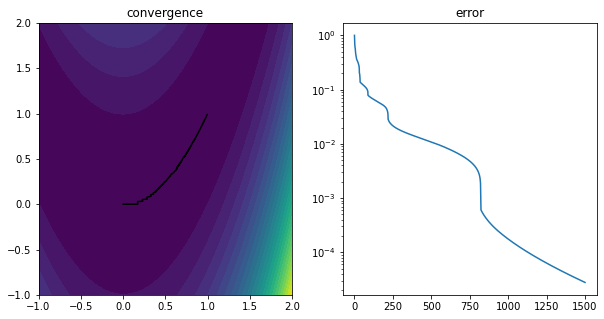

In [2]:
from numpy.linalg import solve

# python code here
def rosenbrock(x):
    x, y = x
    return np.array(100*(y-x**2)**2 + (1-x)**2)

def gradf(x):
    x, y = x
    return np.array([-400*x*(y-x**2) - 2*(1-x), 200*(y - x**2)])


def steepest_descent(rosenbrock, gradf, x, Bk, epsilon, max_iteration):
    
    x_total_f = []
    x_vals = [np.array([0,0])]
    
    for k in range(max_iter):
        
        gradient = gradf(x)
        sk = -gradient
        pk = solve(Bk, sk)
        print('Alpha params: ', gradf, x, sk, gradient)
        alpha = scipy.optimize.line_search(rosenbrock, gradf, x, sk, gfk=gradient)[0]
    
        try:
            sk = alpha * pk
        except TypeError:
            return x_total_f
        
        x += sk
        x_total_f.append(rosenbrock(x))
        x_vals.append(np.array([x[0], x[1]]))
    
    return x_total_f, x_vals
    

x = np.array([0,0])
# Do method of steepest descent
# YOUR CODE HERE

max_iter = 1500
xk, Bk = np.array([0.0, 0.0]), np.eye(2)
x_total_f, x_vals = steepest_descent(rosenbrock, gradf, xk, Bk, 1e-10, max_iter)

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,5))
X, Y = np.linspace(-1, 2, 101), np.linspace(-1,2, 101)
xx, yy = np.meshgrid(X, Y)
ff = np.zeros(xx.shape)
for i, x in enumerate(X):
    for j, y in enumerate(Y):
        ff[j,i] = rosenbrock((x,y))
ax0.contourf(xx,yy,ff, levels=25, cmap='viridis')
ax0.plot([x[0] for x in x_vals], [x[1] for x in x_vals], 'k-')
ax0.set_title("convergence")
ax1.semilogy([np.abs(rosenbrock((x,y))) for (x,y) in x_vals])
ax1.set_title("error")
plt.show()


----
# Exercise 3

## (a) 2 points

Implement the BFGS method for unconstrained optimization, given in Heath chapter 6. Test the correctness of the code using the data in Example 6.13.

In [3]:
def f_function(xy):
    x, y = xy
    return 0.5*x**2 + 2.5*y**2

def f_gradient(xy):
    x, y = xy
    return np.array([x, 5*y])

def BFGS(f_function, f_gradient, xk, Bk, gradient):
    
    pk = solve(Bk, -gradient)
    alpha=1.0
    sk = alpha * pk
    xk += sk
    yk = -1.0 * gradient
    gradient = f_gradient(xk)
    yk += gradient
    
    Bksk = Bk @ sk
    Bk += (1.0 / np.dot(yk, sk)) * np.outer(yk, yk) - (1.0 / np.dot(sk, Bksk)) * np.outer(Bksk, Bksk)
    
    return xk, Bk, gradient

xk, Bk = np.array([5.0, 1.0]), np.eye(2)
gradient = f_gradient(xk)
print('GRADIENT XK: ', gradient)
x_values = []

print("Values for x:")
for k in range(5):
    xk, Bk, gradient = BFGS(f_function, f_gradient, xk, Bk, gradient)
    x_values.append(f_function(xk))
    print(xk)


print("\nValues for f(x):")
print(x_values)    

GRADIENT XK:  [5. 5.]
Values for x:
[ 0. -4.]
[-2.22222222  0.44444444]
[0.81632653 0.08163265]
[-0.00915314 -0.01533152]
[-0.00054233  0.00092339]

Values for f(x):
[40.0, 2.9629629629629637, 0.34985422740524746, 0.0006295284307446692, 2.278701323931685e-06]


In [4]:
rosenbrock(np.array([1.8, 1.8]))

array(208.)

## (b) 2 points

Apply your implementation of the BFGS method to find a local minimum of the Rosenbrock function (see previous exercise). Use starting point $(0,0)$ and do not assume any knowledge of the Hessian when you choose $B_0$.
Plot the convergence to the minimum.

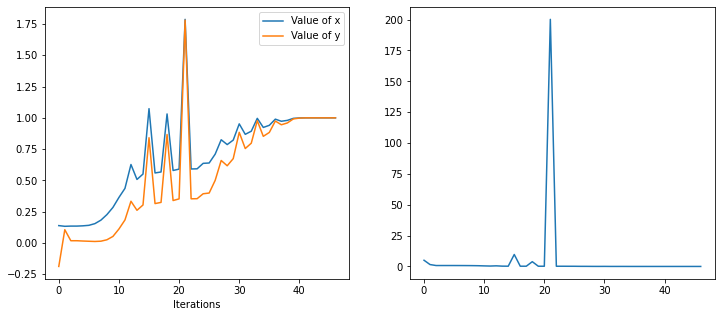

In [5]:
xk = np.array([0.0, 0.0])
Bk = np.eye(2)

gradient = gradf(xk)

x_values = []
x1 = []
x2 =[]

for k in range(50):
    xk, Bk, gradient = BFGS(rosenbrock, gradf, xk, Bk, gradient)
    x_values.append(rosenbrock(xk))
    x1.append(xk[0])
    x2.append(xk[1])


fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,5))
ax0.plot(x1[3:], label="Value of x")
ax0.plot(x2[3:], label="Value of y")
ax0.legend()
ax0.set(xlabel="Iterations")
ax1.plot(x_values[3:])


## (c) 1 point
How does the convergence compare to that of gradient descent (see
previous question)? Let your program count the number of function and gradient evaluations and
consider this in your comparison. Implement a stopping criterion in both methods that runs until $||x_k-x^*||_2 < 10^{-5}$.


In [6]:
x_min = np.array([1.0, 1.0]) # Predefined local minimum of Rosenbrock function
x_0 = np.array([0.0, 0.0])
B_0 = np.eye(2)

def steepest_descent_inner(rosenbrock, gradf, x, x_vals):
    x_total_f = []
    
    gradient = gradf(x)
    sk = -gradient
    alpha = scipy.optimize.line_search(rosenbrock, gradf, x, sk, gfk=gradient)[0]
    
    try:
        sk = alpha * sk
    except TypeError:
        return x_total_f
        
    x += sk
    x_total_f.append(rosenbrock(x))
    x_vals.append(np.array([x[0], x[1]]))
    
    return x, x_total_f, x_vals

def method_comparison(rosenbrock, gradf, x_0, B_0, x_min):
    iteration_count = 0
    
    steep_list = []
    x_steep = np.array([0.0, 0.0])
    steep_vals = [x_steep]
    
    bfgs_list = []
    x_bfgs = np.array([0.0, 0.0])
    B_bfgs= B_0
    gradient_bfgs = gradf(x_bfgs)
    
    while (np.linalg.norm((x_steep - x_min)) >= 10**(-5)) or (np.linalg.norm((x_bfgs - x_min)) >= 10**(-5)):
        if np.linalg.norm((x_steep - x_min)) < 10**(-5):
            steep_list.append([iteration_count, x_steep])
        if np.linalg.norm((x_bfgs - x_min)) < 10**(-5):
            bfgs_list.append([iteration_count, x_bfgs])
        
        x_steep, total_steep, steep_vals = steepest_descent_inner(rosenbrock, gradf, x_steep, steep_vals)

        x_bfgs, B_bfgs, gradient_bfgs = BFGS(rosenbrock, gradf, x_bfgs, B_bfgs, gradient_bfgs)
        
        iteration_count += 1
    
    steep_list.append([iteration_count, x_steep])    
    bfgs_list.append([iteration_count, x_bfgs])
    return steep_list, bfgs_list

steep_list, bfgs_list = method_comparison(rosenbrock, gradf, x_0, B_0, x_min)

print('Steepest Descent converges after ', steep_list[0][0], ' iterations.')
print('BFGS converges after ', bfgs_list[0][0], ' iterations.')

<ipython-input-3-a3a0dcb77799>:20: RuntimeWarning: divide by zero encountered in double_scalars
  Bk += (1.0 / np.dot(yk, sk)) * np.outer(yk, yk) - (1.0 / np.dot(sk, Bksk)) * np.outer(Bksk, Bksk)
<ipython-input-3-a3a0dcb77799>:20: RuntimeWarning: invalid value encountered in multiply
  Bk += (1.0 / np.dot(yk, sk)) * np.outer(yk, yk) - (1.0 / np.dot(sk, Bksk)) * np.outer(Bksk, Bksk)


Steepest Descent converges after  6947  iterations.
BFGS converges after  46  iterations.


Steepest descent takes a lot more iterations to converge than the BFGS method. 6947 iterations versus 46.